# Unit 2.4.1 Simple Linear Regression

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

## Simple Linear Regression

Regression allows us to predict continuous variables.  The most common methor is **ordinary least squares** or **"OLS"**.  People will often refer to it simple as "regression".

OLS operates by finding estimators for coefficients in a formula that you define to explain the relationship between variables.  You have a target variable and one or more input variables.  **Simple linear regression** is when you have one input and one target variable.

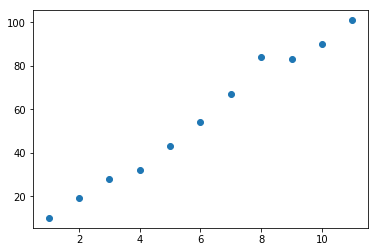

In [2]:
# Sample data to play with.
y = pd.DataFrame([10, 19, 28, 32, 43, 54, 67, 84, 83, 90, 101])
x = pd.DataFrame([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

plt.scatter(x, y)

With your eyeballs, it looks like x and y has a linear relationship.  For every 1 x increase, y increases by 9 or 10.  To quantify the relationship exactly, we need to use regression to give the model a functional form that can estimate parameters.  

For this case with two variables and a linear relationship we can use the equation for a line:

$$y = \alpha + \beta x$$

Here, $\alpha$ is the y-intercept and $\beta$ is the slope of the line. To run a linear regression, provide this equation, or functional form, and the model will estimate the parameters, in this case $\alpha$ and $\beta$.

## Least squares
OLS learns what the parameters may be using errors.  Given the functional form that you pass into the model, OLS uses the estimators (estimates for $\alpha$ and $\beta$) that minimizes the error.

By default, that error, aka residual, is the sum of the squared distances between each datapoint and the fit line.  It could technically be any kind of distance measure you want to specify.  The goal of this algorithm is to minimize the sum of these squared residuals over all the data points in the training set.

## Your first regression
To generate a regression using scikit-learn, use the linear_model.LinearRegression class to establish the model, and then fit the model to your x and y variables.

he model class has a few attributes that we will want to see, and plenty of others that we'll go over later, though you can always refer to the [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to see them all. Here we'll use the attributes for intercept and coefficient.

Coefficients:  [[ 9.38181818]]
Intercept:  [-0.74545455]


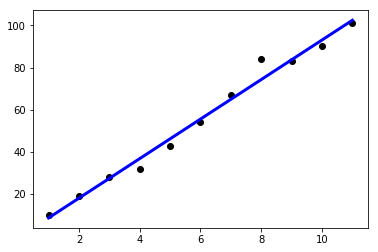

In [3]:
# Instantiate our model
regr = linear_model.LinearRegression()

# Fit our model to our data
regr.fit(x,y)

# Display the attributes we calculated
print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

# Plot outputs
# Plot outputs
plt.scatter(x, y, color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
plt.show()

## Predicting with Simple Linear Regression
Our estimated equation is:

$$ y = \hat{\alpha} + \hat{\beta}x = -.75 + 9.38x $$

To generate predictions with this trained model, the model will simply input the x-value to get the predicted y.  

For example, the prediction for `x = 12` would be: 

$$ y = -.75 + 9.38 * 12 = 111.84 $$

This is because your model has defined a linear relationship between the two variables. For each unit x increases, y will increase by 9.381. This is the beginning of a topic called explanatory power

Be careful with extrapolating!  The model assumes the relationship is valid for all values of x.  It would return a result for `x = 102,830` even though that is way out of sample and probably no longer accurate. 

# Unit 2.4.2 Multivariable Regression

When a least squares regression has more than one independent variable affecting the outcome, we use multivariable least squares linear regression (aka multiple linear regression, aka multivariable regression, NOT aka "multivariate" regression which involves more than one dependent variable). 

As with the simpler models, here again the linear regression algorithm arrives at estimates for coefficients in front of each variable that minimize the sum of squared errors. 

## Categorical Variables
Categorical variables are treated individually, allowing each value to have its own associated coefficient with separate binary indicators (0, 1) for each.  

Let's say our town was broken into three neighborhoods: Downtown, South, and North. Then our specification would look something like:

$$ Rent = \alpha + SquareFootage + Bedrooms + Bathrooms + YearBuilt + Downtown + South $$

Note, one category will always be excluded.  That's because it will be incorporated into the intercept ($\alpha$) and we would otherwise run into collinearity problems (more on that later).  Also, each of these categories are mutually exclusive, fo it the house isn't Downtown or South, it would be in North.

Python offers you two real ways to deal with creating these indicators. The first is to do it manually. If this seems hard or complicated to you THEN YOU SHOULD ABSOLUTELY DO IT! It's good programming practice. However, SKLearn (of course) has a [built in function](http://scikit-learn.org/stable/modules/preprocessing.html) called `OneHotEncoder` that will also do this kind of data preparation.

## Linear doesn't have to mean lines...
The model assumes linear relationship between the predictors and the outcome, but the predictors don't have to be linear.  

For example, if you specified a functional form of:

$$ y = \alpha + x + x^2 $$

That is perfectly doable in multivariable regression as long as you pass through a dataframe where one column is $x$ and the other column is $x^2$. It is not uncommon to see things like sine or cosine when dealing with a seasonal time series. You can get as complicated as you want, though be careful. Adding a lot of terms can destroy your model by violating the assumptions of OLS. We'll get into those assumptions in the next lesson.

# Unit 2.4.3 Explanatory Power: Assumptions of linear regression

In [32]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

## The Extraordinary Power of Explanatory Power

The strength of multiple linear regression lies in its ability to provide straightforward and interpretable solutions that not only predict future outcomes, but also provide insight into the underlying processes that create these outcomes.  For example, after fitting the following model:

$$HourlyWidgetProduction = \alpha + \beta_1WorkerAgeFrom18+ \beta_2WorkerYearsinJob + \beta_3IsRoundWidget$$

we get these parameters:
$$\alpha = 2$$
$$\beta_1 = .1$$
$$\beta_2 = .2$$
$$\beta_3 = 4$$

Using those parameters, we learn that round widgets are twice as fast to produce as non-round widgets. We can tell because $\alpha$ represents the intercept, the hourly rate of production for widgets that are not round (2 an hour) and $\beta_3$ represents the difference between the intercept and the hourly rate of production for round widgets (also 2 an hour, for a total of 4 round widgets an hour).

We also learn that for every year a worker ages after the age of 18, their hourly production-rate goes up by .1 ($\beta_2$).  In addition, for every year a worker has been in that job, their hourly production-rate goes up by .2 ($\beta_3$).  

Furthermore, using this model, we can predict that a 20-year-old worker who has been in the job for a year and is making only round widgets will make $2 + .1*2 + .2*1 + 4 = 6.3$ round widgets an hour.

Finally, and probably of greatest interest, we get an **R-Squared** value.  This is a proportion (between 0 and 1) that *expresses how much variance in the outcome variable our model was able to explain.*  Higher $R^2$ values are better to a point-- a low $R^2$ indicates that our model isn't explaining much information about the outcome, which means it will not give very good predictions.  However, *a very high $R^2$ is a warning sign for overfitting.*  No dataset is a perfect representation of reality, so a model that perfectly fits our data ($R^2$ of 1 or close to 1) is likely to be biased by quirks in the data, and will perform less well on the test-set.

Below is a toy advertising dataset.

In [3]:
# Read data into a DataFrame.
data_url = 'https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/Advertising.csv'
data = pd.read_csv(data_url, index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.100,37.800,69.200,22.100
2,44.500,39.300,45.100,10.400
3,17.200,45.900,69.300,9.300
4,151.500,41.300,58.500,18.500
5,180.800,10.800,58.400,12.900


In [6]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000,200.000,200.000,200.000
mean,147.042,23.264,30.554,14.023
std,85.854,14.847,21.779,5.217
min,0.700,0.000,0.300,1.600
25%,74.375,9.975,12.750,10.375
50%,149.750,22.900,25.750,12.900
75%,218.825,36.525,45.100,17.400
max,296.400,49.600,114.000,27.000


In [4]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [ 2.93888937]

R-squared:
0.897210638179


The model where the outcome Sales is predicted by the features TV, Radio, and Newspaper explains 89.7% of the variance in Sales.  Note that we don't know from these results how much of that variance is explained by each of the three features.  Looking at the coefficients, there appears to be a base rate of Sales that happen even with no ads in any medium (intercept: 2.939) and sales have the highest per-unit increase when ads are on the radio (0.189).  

## Assumptions of Multivariable Linear Regression

### Assumption 1: Linear relationship
Features in a regression need to have a linear relationship with the outcome.  
To make a non-linear relationship linear, you can apply a non-linear transformation function.  E.g. If the relationship between feature and outcome is quadratic, we can take the square root of the features.

When interpretting transformed features, you have to keep these transformations in mind.
Here are [fifty ways to fix your data](https://statswithcats.wordpress.com/2010/11/21/fifty-ways-to-fix-your-data/).

### Assumption 2: multivariate normality
The error from the model (i.e. predicted values - real outcome values) should be normally distributed.
Outliers or skewness in error can often be because of outliers or skewness in data.

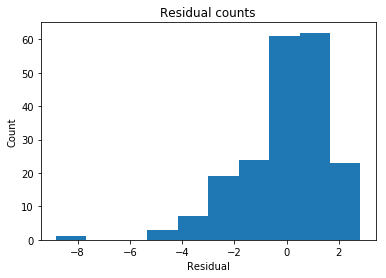

In [8]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

### Assumption 3: homoscedasticity
The distribution of your error terms (its "scedasticity"), should be consistent for all predicted values, or **homoscedastic**.

IF you error terms are not consistently distributed and you have more variance in the error for large outcomes than small ones, then the confidence interval for large predicted values will be too small because it will be based on the average error variance.  This leads to overconfidence in the accuracy of your model predictions.

Fixes to heteroscedasticity include transforming the dependent, outcome variable and adding features that target the poorly-estimated areas.  

For example, if a model tracks data over time and model error variance jumps in the September to November period, a binary feature indicating season may be enough to resolve the problem.

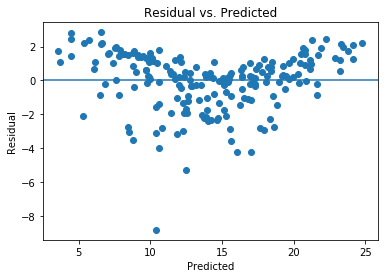

In [9]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

# Hm... looks a bit concerning.

### Assumption 4: low multicollinearity

Correlations among features should be low or nonexistent.  When features are correlated, they may both explain the same pattern of variance in the outcome.  The model may solve the problem by attributing half the explanatory power to one feature and half to the other.  If our only goal is prediction, this is nbd.  However, if we want to know what features matter the most, multicollinearity can cause us to underestimate the relationship between features and outcomes.

Multicollinearity can be fixed by PCA or by discarding some of the correlated features.

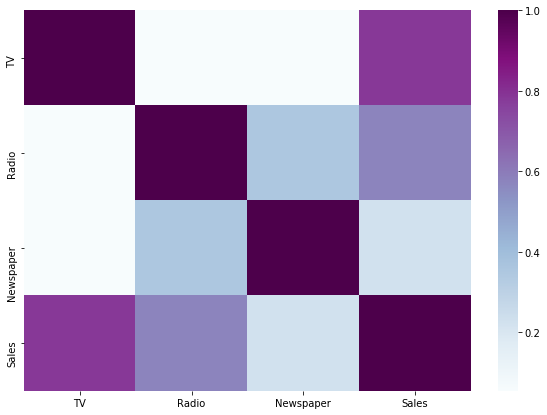

In [10]:
#Set up matplotlib
f, ax = plt.subplots(figsize=(10,7))

sns.heatmap(data.corr(), cmap='BuPu')

## Drill: fixing assumptions

Judging from the diagnostic plots, your data has a problem with both heteroscedasticity and multivariate non-normality.  Use the cell(s) below to see what you can do to fix it.

### Fixing Multivariate non-normality
According to the histogram of residuals, the model tends to over-predict sales.

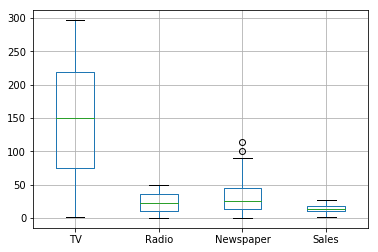

In [11]:
data.boxplot()

The numbers for TV are pretty inflated compared to the other variables.  

**Let's trying logging the TV column.**

In [8]:
data['log_TV'] = np.log(data.TV)

In [13]:
# Setting up new linear regression model
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1,1)

# Taking out Newspaper because that doesn't seem to add much value to the model, according to the coefficients.
X = data[['log_TV','Radio']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 3.93375716  0.20538391]]

Intercept: 
 [-9.13426752]

R-squared:
0.906574834534


Not bad.  There is an improvement in R^2, indicating that the model is a better fit for the data.

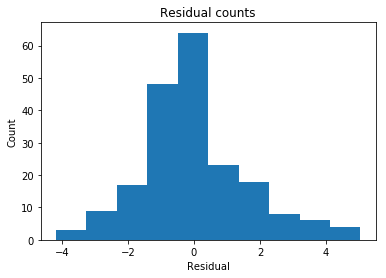

In [14]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

# Plotting the residuals on a histogram.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

The distribution of the residuals are no longer skewed!  It looks like logging TV ads fixed multivariate non-normality.

### Fixing heteroscedasticity

Let's see if the distribution of the error terms is more homoscedastic with the new model.

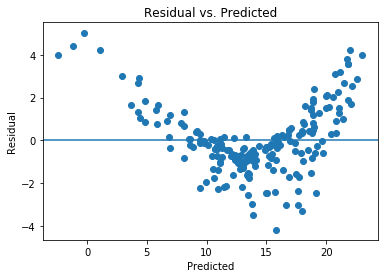

In [15]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

Eek, it looks worse!
Let's try logging Sales.

In [16]:
data['log_Sales'] = np.log(data.Sales)

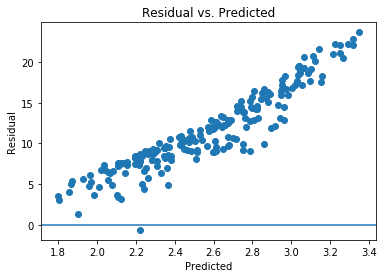

In [18]:
# Setting up new linear regression model
regr = linear_model.LinearRegression()
Y = data['log_Sales'].values.reshape(-1,1)

# Taking out Newspaper because that doesn't seem to add much value to the model, according to the coefficients.
X = data[['TV','Radio']]
regr.fit(X, Y)

# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

# Generating residuals and predicted scatterplot
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

Nope.

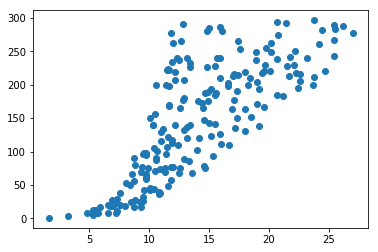

In [5]:
plt.scatter(data['Sales'], data['TV'])

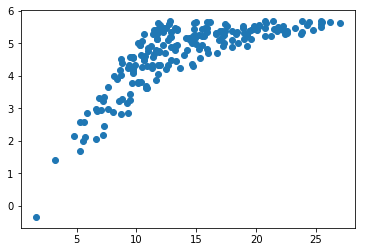

In [9]:
plt.scatter(data['Sales'], data['log_TV'])

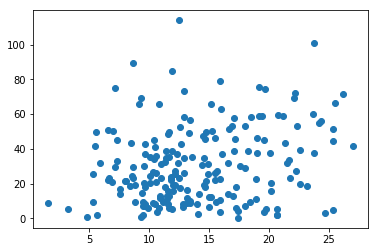

In [20]:
plt.scatter(data['Sales'],data['Newspaper'])

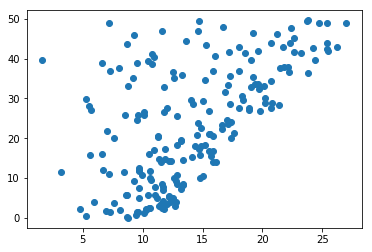

In [21]:
plt.scatter(data['Sales'],data['Radio'])

In [10]:
data['log_TV_squared'] = data['log_TV']**2

In [23]:
data['log_radio'] = np.log(data['Radio']+1)

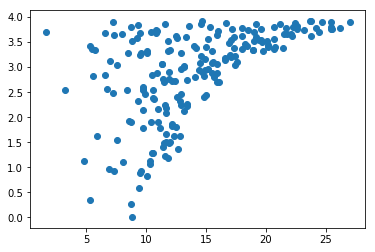

In [24]:
plt.scatter(data['Sales'],data['log_radio'])

In [28]:
data['inverse_radio'] = 1 / (data['Radio']+1)

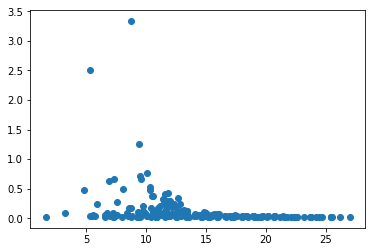

In [26]:
plt.scatter(data['Sales'],data['inverse_radio'])

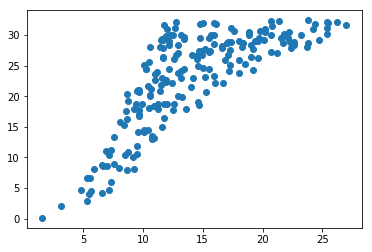

In [11]:
plt.scatter(data['Sales'],data['log_TV_squared'])

In [18]:
regr4 = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1,1)

X = data[['log_TV','log_TV_squared','Radio','Newspaper']]
regr4.fit(X,Y)

# Inspect the results.
print('\nCoefficients: \n', regr4.coef_)
print('\nIntercept: \n', regr4.intercept_)
print('\nR-squared:')
print(regr4.score(X, Y))


Coefficients: 
 [[  2.93725748e-01   4.74385404e-01   1.99153183e-01  -1.14300779e-04]]

Intercept: 
 [-2.81144776]

R-squared:
0.927219679803


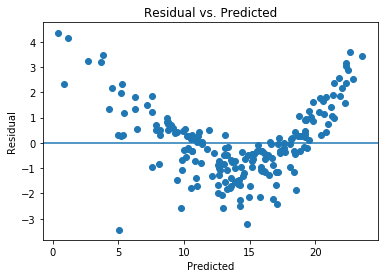

In [19]:
# Extract predicted values.
predicted = regr4.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

# Generating residuals and predicted scatterplot
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [29]:
regr5 = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1,1)

X = data[['log_TV','log_TV_squared','inverse_radio','Newspaper']]

regr5.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr5.coef_)
print('\nIntercept: \n', regr5.intercept_)
print('\nR-squared:')
print(regr5.score(X, Y))


Coefficients: 
 [[ -0.81320491   0.5970688  -11.64662556   0.03401371]]

Intercept: 
 [ 4.23399062]

R-squared:
0.733224870031


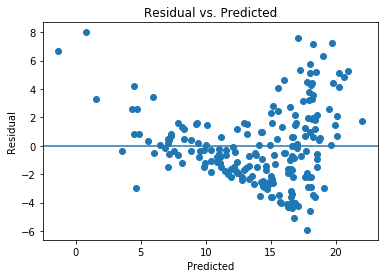

In [30]:
# Extract predicted values.
predicted = regr5.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

# Generating residuals and predicted scatterplot
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

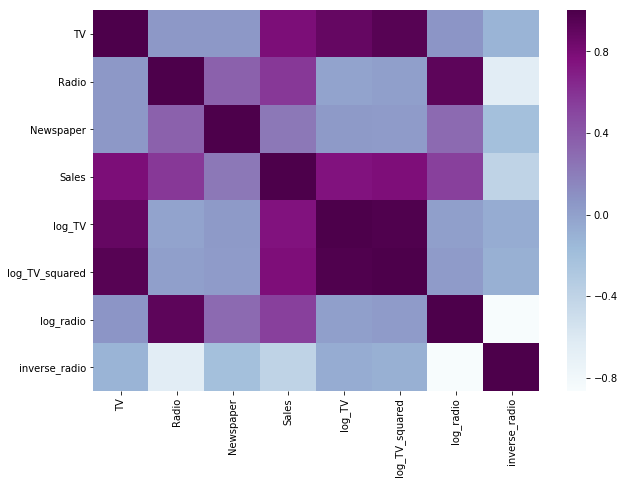

In [33]:
#Set up matplotlib
f, ax = plt.subplots(figsize=(10,7))

sns.heatmap(data.corr(), cmap='BuPu')